LSTM stands for Long Short Term Memory Networks. It is a type of recurrent neural network that is commonly used for regression and time series forecasting in machine learning. It can memorize data for long periods, which differentiates LSTM neural networks from other neural networks. If you want to learn how to predict stock prices with LSTM, this article is for you. In this article, I will walk you through the task of stock price prediction with LSTM using Python.

In [45]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

In [46]:
today = date.today()

In [47]:
print(today)

2024-03-28


In [48]:
# Corrected formatting for date strings
d1 = today.strftime("%Y-%m-%d")
end_date = d1

# Calculate start date 5000 days ago and format it
d2 = today - timedelta(days=5000)
start_date = d2.strftime("%Y-%m-%d")


In [49]:
data = yf.download('GC=F', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)

In [50]:
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]

In [51]:
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3439,2024-03-21,2207.000000,2211.600098,2182.399902,2182.399902,2182.399902,63
3440,2024-03-22,2179.199951,2179.600098,2157.500000,2158.100098,2158.100098,19
3441,2024-03-25,2166.199951,2179.399902,2166.199951,2174.800049,2174.800049,79
3442,2024-03-26,2182.699951,2182.699951,2175.600098,2175.600098,2175.600098,202373
3443,2024-03-27,2179.399902,2196.199951,2172.100098,2190.600098,2190.600098,202373


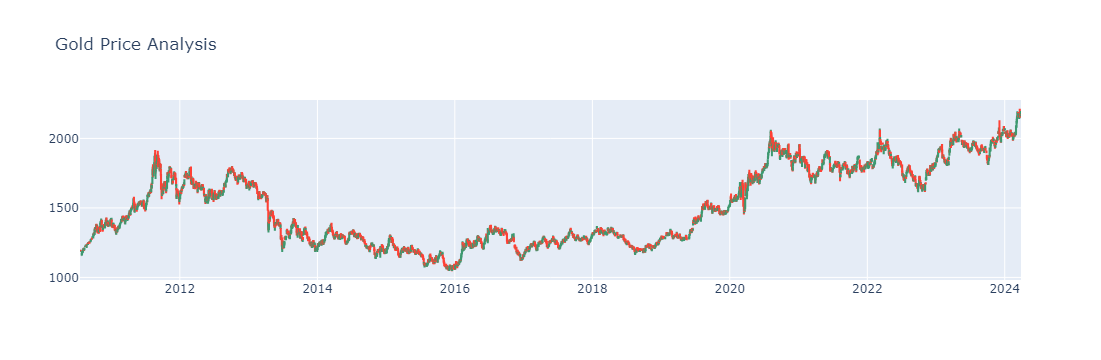

In [54]:
import plotly.graph_objects as go

# Create a candlestick chart
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])

# Update layout
figure.update_layout(title="Gold Price Analysis", 
                     xaxis_rangeslider_visible=False)

# Show the plot
figure.show()


In [55]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))


Close        1.000000
Adj Close    1.000000
Low          0.999503
High         0.999355
Open         0.998812
Date         0.532152
Volume      -0.012970
Name: Close, dtype: float64


In [61]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [62]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 128)            66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=10)


Epoch 1/10
2755/2755 [==============================] - 17s 4ms/step - loss: 345511.3750
Epoch 2/10
2755/2755 [==============================] - 12s 4ms/step - loss: 78220.8203
Epoch 3/10
2755/2755 [==============================] - 13s 5ms/step - loss: 78422.3750
Epoch 4/10
2755/2755 [==============================] - 16s 6ms/step - loss: 78486.9141
Epoch 5/10
2755/2755 [==============================] - 18s 7ms/step - loss: 78526.3047
Epoch 6/10
2755/2755 [==============================] - 13s 5ms/step - loss: 78176.6641
Epoch 7/10
2755/2755 [==============================] - 14s 5ms/step - loss: 78436.5156
Epoch 8/10
2755/2755 [==============================] - 16s 6ms/step - loss: 78360.8594
Epoch 9/10
2755/2755 [==============================] - 13s 5ms/step - loss: 78457.9062
Epoch 10/10
2755/2755 [==============================] - 12s 4ms/step - loss: 78537.7656


In [65]:
import numpy as np
#features = [Open, High, Low, Volume]
features = np.array([[1777.089996, 1780.419998, 1777.070007]])
model.predict(features)

1/1 [==============================] - 0s 23ms/step


array([[1517.0181]], dtype=float32)